# 카메라 앱 만들기

## 이미지 불러오기

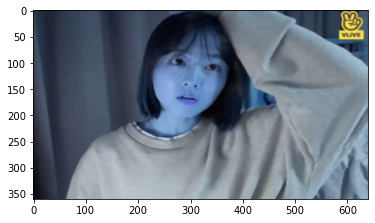

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
my_image_path = 'images/test.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

## BGR2RGB

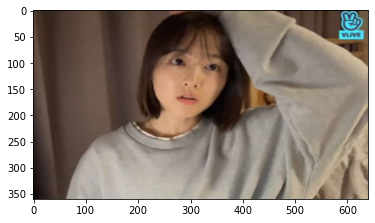

In [2]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## dlib FaceDetector

rectangles[[(239, 67) (368, 196)]]
239
67
368
196


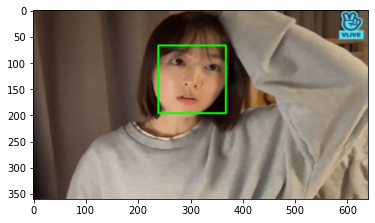

In [4]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    print(l)
    t = dlib_rect.top()
    print(t)
    r = dlib_rect.right()
    print(r)
    b = dlib_rect.bottom()
    print(b)

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## dlib face landmarks

In [12]:
import dlib
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    print(dlib_rect)
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(list_landmarks)

[(239, 67) (368, 196)]
[[(231, 96), (229, 115), (228, 133), (230, 150), (235, 166), (245, 179), (257, 190), (271, 200), (285, 205), (300, 204), (314, 199), (328, 190), (340, 181), (351, 169), (361, 154), (368, 140), (373, 123), (251, 83), (263, 74), (278, 72), (293, 75), (305, 83), (323, 87), (336, 83), (350, 85), (363, 90), (370, 101), (312, 102), (311, 113), (309, 123), (308, 133), (290, 143), (296, 146), (302, 148), (309, 148), (315, 147), (264, 98), (274, 94), (284, 95), (290, 104), (282, 104), (272, 102), (329, 110), (339, 104), (348, 106), (354, 112), (347, 114), (337, 113), (274, 167), (284, 161), (294, 157), (299, 160), (304, 159), (310, 166), (315, 174), (307, 179), (300, 180), (294, 180), (289, 179), (281, 175), (279, 166), (293, 166), (297, 167), (302, 168), (311, 172), (301, 170), (296, 170), (291, 169)]]


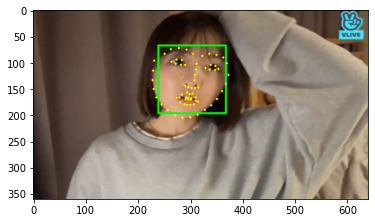

In [13]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 스티커 적용하기

In [14]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(308, 133)
(x,y) : (308,68)
(w,h) : (130,130)


In [15]:
sticker_path = 'images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(130, 130, 3)


In [16]:
# 이미지 시작점이 top-letf 좌표이기 때문에 조정
refined_x = x - w // 2  # left
refined_y = y - h       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (243,-62)


In [17]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(68, 130, 3)


In [18]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (243,0)


In [21]:
# sticker_area -> 원본이미지에서 스티커를 적용할 위치를 Crop힌 이미지
# (243,0) ~ (243+130, 0+(130-62))
'''
스티커 이미지에서 사용할 부분은 0 이 아닌 색이 있는 부분을 사용합니다.
따라서 np.where를 통해 img_sticker 가 0 인 부분은 sticker_area를 
사용하고 0이 아닌 부분을 img_sticker를 사용하시면 됩니다. 
'''
sticker_area = img_show[refined_y:img_sticker.shape[0], 
                        refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], 
         refined_x:refined_x+img_sticker.shape[1]] = \
np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

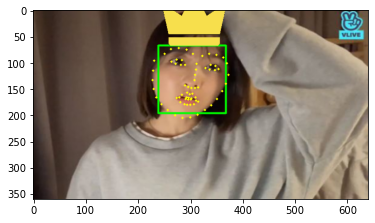

In [22]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

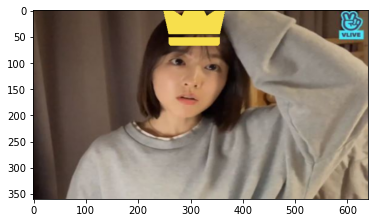

In [23]:
sticker_area = img_bgr[refined_y:img_sticker.shape[0], 
                       refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:img_sticker.shape[0], 
        refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()